In [7]:
import numpy as np
import pandas as pd
import json

In [21]:
# data_path = "/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_res.csv"
data_path = "/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn_pixels_76_res_real_life_images.csv"

In [22]:
df = pd.read_csv(data_path)

In [23]:
prediction_label = list()

for item in df["PREDICTION"]:
    item = item[1:-1]
    float_list= [float(x) for x in item.split(", ")]
    prediction_label.append(np.argmax(float_list))

h = """{'0': 'adidas',
 '1': 'apple',
 '2': 'cocacola',
 '3': 'disney',
 '4': 'nike',
 '5': 'nologo',
 '6': 'puma'}"""

json_acceptable_string = h.replace("'", "\"")
id2label = json.loads(json_acceptable_string)
id2label = {int(k): v for k,v in id2label.items()}
prediction_label_text = [id2label[x] for x in prediction_label]

In [24]:
df["PREDICTION_LABEL_TEXT"] = prediction_label_text
df["PREDICTION_LABEL_ID"] = prediction_label
df.to_csv("/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn_pixels_76_res_real_life_images_extended.csv", index=False)

In [12]:
# df["PREDICTION_LABEL_TEXT"] = prediction_label_text
# df["PREDICTION_LABEL_ID"] = prediction_label
# df.to_csv("/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_res_extended.csv", index=False)

### Innen jön a data science

In [27]:
# data_path2 = "/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_res_extended.csv"
# outfile = "/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_by_class.csv"
# df = pd.read_csv(data_path2)

In [25]:
data_path2 = "/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn_pixels_76_res_real_life_images_extended.csv"
outfile = "/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn_pixels_76_res_real_life_images_by_class.csv"
df = pd.read_csv(data_path2)

In [26]:
def accuracy_by_class(y, pred):
    class_good = dict()
    class_bad = dict()
    
    for a, b in zip(y, pred):
        if a not in class_good:
            class_good[a] = 0
            
        if a not in class_bad:
            class_bad[a] = 0
        if a == b:
            class_good[a] += 1
        else:
            class_bad[a] += 1
    
    return class_good, class_bad
    

In [27]:
differency = dict()
good, bad = accuracy_by_class(df["LABEL"], df["PREDICTION_LABEL_TEXT"])

for key, value in good.items():
    differency[key] = value / (value + bad[key])

with open (outfile, "w") as out_f:
    for key, value in differency.items():
        out_f.write("{}, {}\r\n".format(key, value))
    
# res = pd.DataFrame.from_dict(differency, orient='index')
# res.to_csv(outfile, index=False)



In [28]:
differency

{'adidas': 0.2,
 'apple': 0.38571428571428573,
 'cocacola': 0.9,
 'disney': 0.2,
 'nike': 0.02857142857142857,
 'nologo': 0.0,
 'puma': 0.04411764705882353}

In [29]:
labels = list()
accuracy = list()

for key, value in differency.items():
    labels.append(key)
    accuracy.append(value)

plotting_df = pd.DataFrame({"LABELS": labels, "ACCURACY": accuracy})
plotting_df

,LABELS,ACCURACY
0,adidas,0.200000
1,apple,0.385714
2,cocacola,0.900000
3,disney,0.200000
4,nike,0.028571
5,nologo,0.000000
6,puma,0.044118


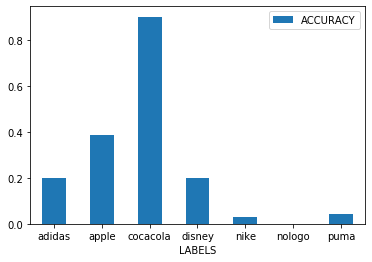

In [31]:
ax = plotting_df.plot.bar(x='LABELS', y='ACCURACY', rot=0)